In [2]:
import pandas as pd
import numpy as np
from astropy.table import Table
from astropy.io import ascii
# from funcs.api_ps import retrieve_lightcurve_ps
import matplotlib.pyplot as plt
%matplotlib inline
path = '/disk1/hrb/python/data/surveys/ps/'

The query used to obtain this located in /queries/PS_nearby_search.txt and shown below. It finds all objects up to 2.4" around the dr14qso catalogue coordinate pairs. If a neighbour was found in SDSS within 2.4" then this is used as the upper bound of the search to prevent mismatching. 

In [3]:
ps_data = pd.read_csv(path + 'calibStars_psoids.csv',float_precision = 'round trip', index_col=0)
ps_data.head()

,objID_ps,ra_ps,dec_ps,ra,dec,sep
uid_s,,,,,,
52,106653085036468106,308.503658,-1.118597,308.503693,-1.118605,0.001564
56,106683085055196751,308.505527,-1.094732,308.505493,-1.094746,0.003102
60,106513085092773352,308.509278,-1.239227,308.509308,-1.239229,0.001151
63,106623085115055207,308.511494,-1.146008,308.511505,-1.146013,0.001186
75,106513085246816157,308.524690,-1.236875,308.524689,-1.236883,0.000981


We are querying StackObjectThin thus we expect a one to one match, however, sometimes additional IDs are returned. We filter these out. There are about 421 of these duplicates.

In [4]:
print('Before dropping:',ps_data.shape)
ps_data.drop_duplicates(subset = 'objID_ps',inplace = True)
print('After dropping: ',ps_data.shape)

Before dropping: (614276, 6)
After dropping:  (611799, 6)


Let's look at the neighbours we picked up.

In [7]:
ps_dup = ps_data[ps_data.index.duplicated(keep = False)]

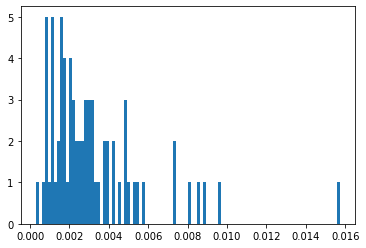

In [9]:
ps_dup = ps_dup.sort_values('sep')
mask = ps_dup.index.duplicated(keep = 'first')
primary   = ps_dup[~mask]
plt.hist(primary['sep'],bins = 100);
# secondary = ps_dup[mask].drop_duplicates(subset = 'uid', keep = 'first') # find neighbours and get rid of additional neighbours

In [9]:
# Finding mismatched objects
# prim_sec = pd.merge(  primary[['uid','ra_ps','dec_ps','objID_ps','sep','sep_upper']],
#                     secondary[['uid','ra_ps','dec_ps','objID_ps','sep','sep_upper']], on='uid', suffixes = ('_p','_s'))
# prim_sec['sep_diff_arcsec'] = (prim_sec.sep_s - prim_sec.sep_p)*60.0
# plt.figure(figsize=(15, 4))
# plt.xticks(np.linspace(0,2.5,26))
# plt.hist(prim_sec['sep_diff'], bins = 70);

There are about 30 objects (ones with sep_diff < ~0.3 arcsec) which did not stack properly - these have duplicate object IDs, however it is much smaller than our entire sample so we will just use a single objID, whichever has a closer ra,dec to the reference coords. Run the code above to see this.

In [ ]:
#loop this over all objID_ps in batches of ~20, with error exception 
dcolumns = dcolumns = ("""objID,filterID,obsTime,psfFlux,psfFluxErr""").split(',')
retrieve_lightcurve_ps(primary['objID_ps'][:20])

#TODO
primary.to_csv - merge with SDSS ids. Get all SDSS observations in one table